In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
data = pd.read_csv('../data/interim/sueldos.csv')

In [3]:
COLUMNS = ['sexo', 'edad','provincia', 'experiencia', 'antiguedad','cargo', 'salario', 'es_neto']

def clean(df, columns, threshold=3, group_by='cargo', order_by='salario'):
    subset = df[columns]
    subset = subset[(np.abs(stats.zscore(subset.salario)) < 3)]
    subset = subset.groupby(group_by).filter(lambda x: len(x) > threshold).sort_values(by=order_by, ascending=False)
    return subset


subset = clean(data, COLUMNS, threshold=10)
subset[['experiencia', 'antiguedad']] = subset[['experiencia', 'antiguedad']].apply(pd.to_numeric)
print(len(subset))
subset.head()

3549


,sexo,edad,provincia,experiencia,antiguedad,cargo,salario,es_neto
1,Hombre,18 - 20,Río Negro,1.0,1.0,Developer,780000,Neto
2,Hombre,31 - 33,Ciudad Autónoma de Buenos Aires,11.0,2.0,SysAdmin / DevOps,390000,Bruto
3,Hombre,31 - 33,Córdoba,7.0,2.0,Developer,165000,Neto
4,Hombre,34 - 36,Córdoba,11.0,3.0,Developer,150000,Bruto
5,Hombre,31 - 33,Ciudad Autónoma de Buenos Aires,5.0,5.0,Developer,140000,Neto


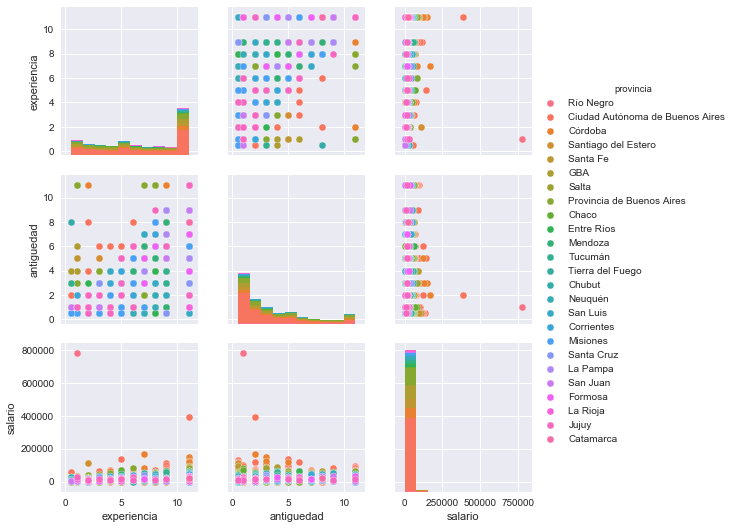

In [4]:
sns.pairplot(subset, hue='provincia')